In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import squidpy as sq

adata = sq.datasets.visium_hne_adata()
adata

%matplotlib inline

# Task 0

Get familiar with the dataset. Find out which information is contained in `adata`.

The data provided is a 10X Visium measurement of a coronal section of a mouse.<br>
10X Visium is a spot-based sequencing analysis technique.<br>
The dataset is already processed on the count level, so no further pre-processing is required before doing the spatial analyses.

In [2]:
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

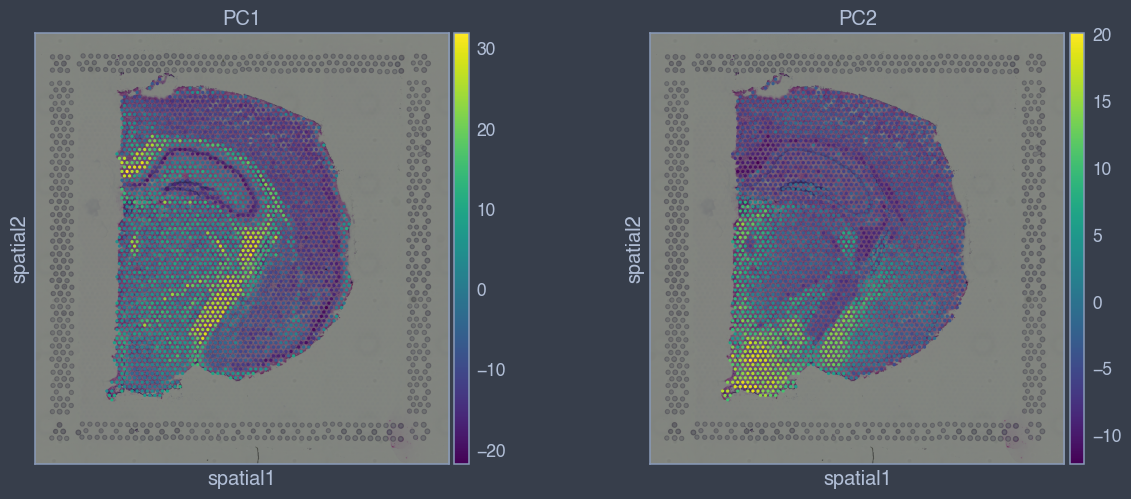

In [3]:
adata.obs["PC1"] = adata.obsm["X_pca"][:, 0]
adata.obs["PC2"] = adata.obsm["X_pca"][:, 1]
sq.pl.spatial_scatter(adata, color=["PC1", "PC2"])

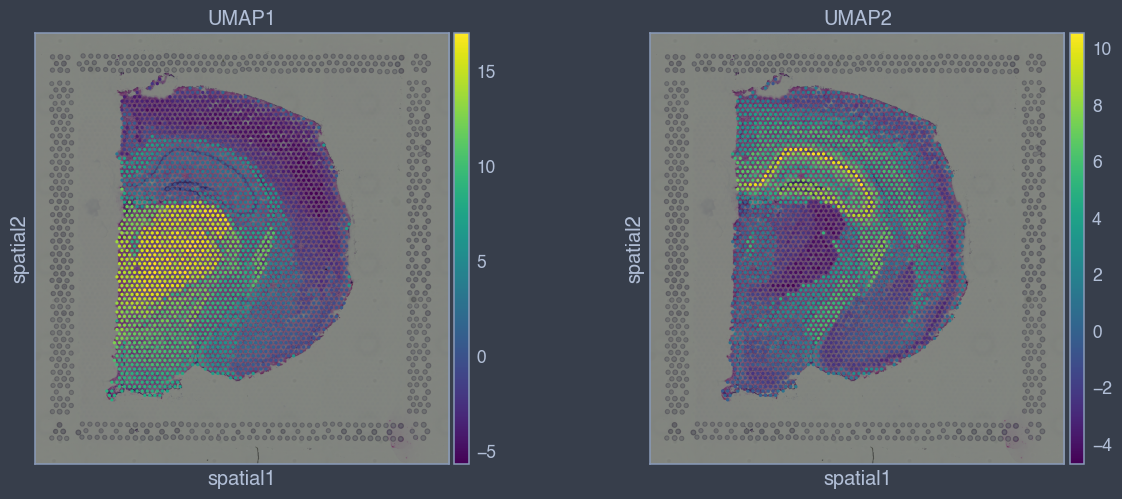

In [4]:
adata.obs["UMAP1"] = adata.obsm["X_umap"][:, 0]
adata.obs["UMAP2"] = adata.obsm["X_umap"][:, 1]
sq.pl.spatial_scatter(adata, color=["UMAP1", "UMAP2"])

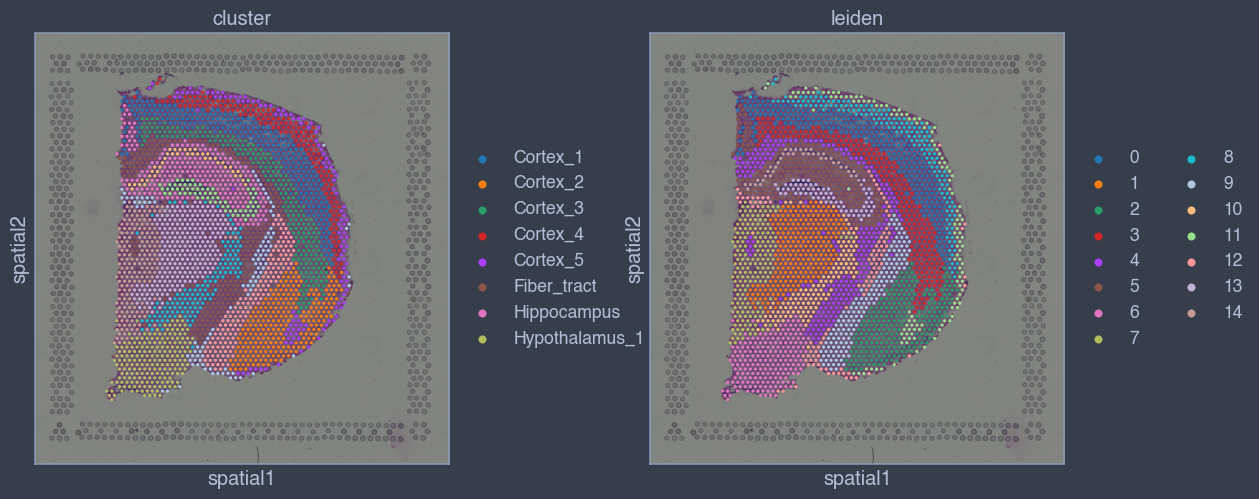

In [5]:
sq.pl.spatial_scatter(adata, color=["cluster", "leiden"])

# Task 1

Find genes that show spatial correlation and compare it to their spatial randomness.

To do so, you need to first compute the cell-cell neighbor graph.
Based on the technology of the data used (10X Visium), make an informed choice on the neighbor-graph algorithm.

In [6]:
sq.gr.spatial_neighbors(adata, key_added='spatial')
sq.gr.spatial_autocorr(
    adata,
    mode="moran",
    genes=adata[:, adata.var.highly_variable].var_names.values[:1000],
    n_perms=100,
    n_jobs=1,
)

  0%|          | 0/100 [00:00<?, ?/s]

/opt/miniconda3/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


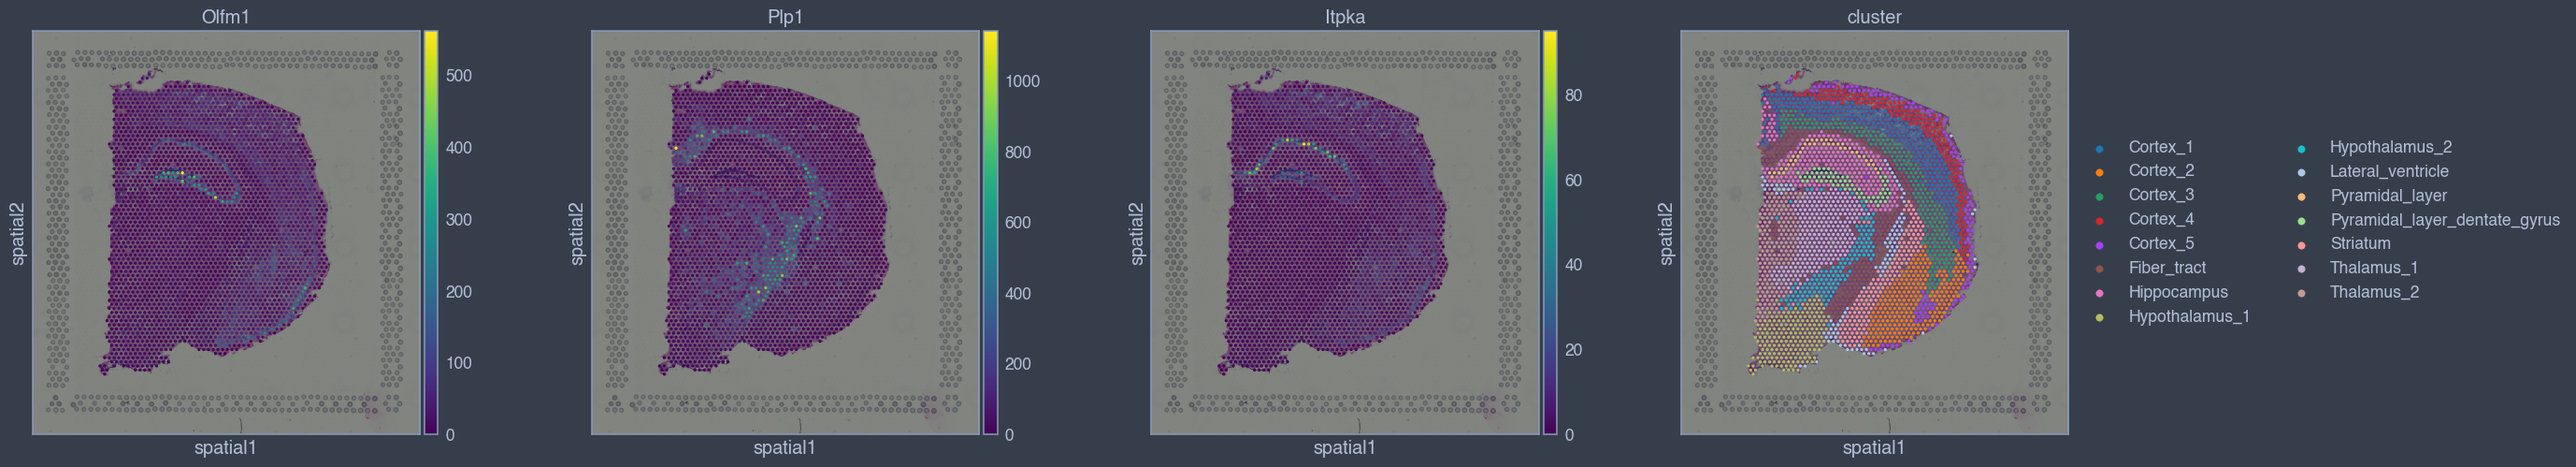

In [7]:
top_genes = list(adata.uns["moranI"].index[:3])
sq.pl.spatial_scatter(adata, color=top_genes + ["cluster"])

# Task 2

Find cell clusters which are co-localizing, i.e. which have a higher probability to be neighbors.

Plotting the statistics for each cluster might be a bit too laborious.
Instead, you can use some prior knowledge by looking at the cell cluster distribution and derive interesting candidates.

How would you interpret the specific results you see?

  0%|          | 0/1 [00:00<?, ?/s]

/opt/miniconda3/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


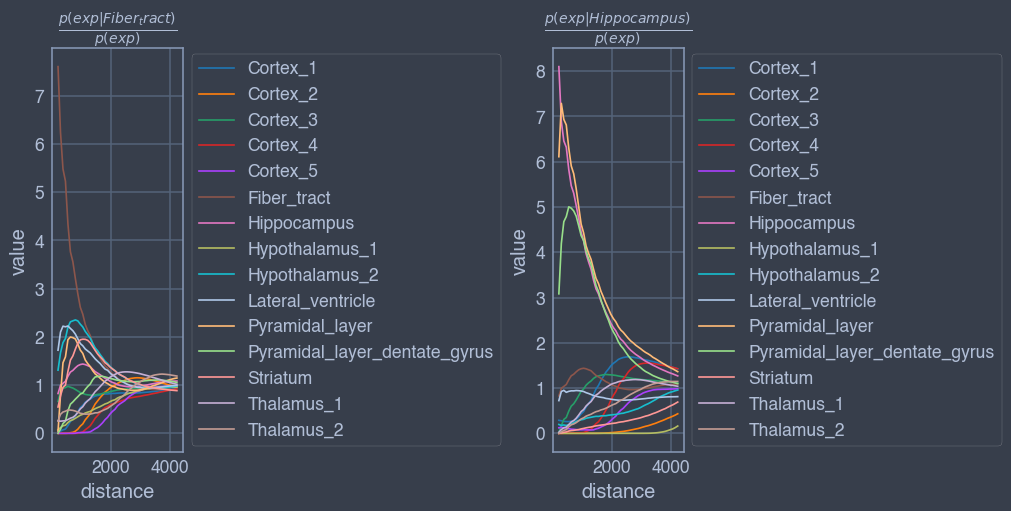

In [8]:
sq.gr.co_occurrence(adata, cluster_key="cluster")
sq.pl.co_occurrence(adata, cluster_key="cluster", clusters=["Hippocampus", "Fiber_tract"])

# Task 3

What cell clusters are more prevalent in the neighborhood of a specific cell type?
How does this compare to the co-occurence results from task 2?

What biological functions might this imply? What downstream analyses could this trigger?

What does the diagonal mean biologically?

  0%|          | 0/1000 [00:00<?, ?/s]

/opt/miniconda3/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


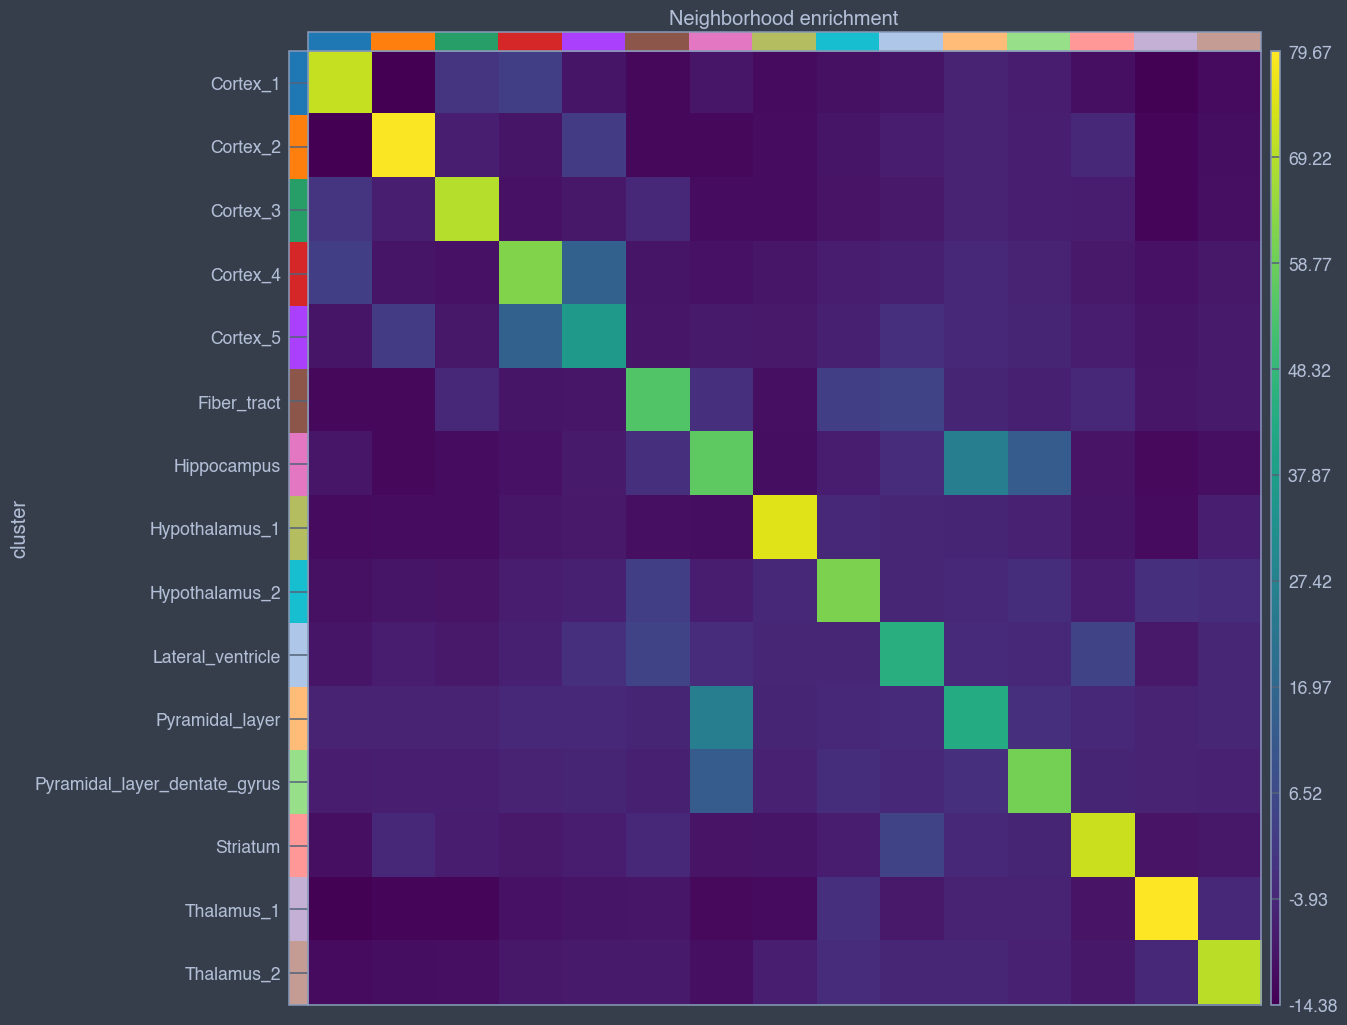

In [9]:
sq.gr.nhood_enrichment(adata, cluster_key="cluster")
sq.pl.nhood_enrichment(adata, cluster_key="cluster")